**PART 1. Focus on the stock you pick and their competitors**

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import yfinance as yf
import ta
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader._utils import RemoteDataError

In [3]:
# Start date
start_date = datetime(2023, 1, 1)
# End date
end_date = datetime(2024, 8, 31)

Download stock data for the 5 companies

In [4]:
# Our stock - NVDA
NFLX = yf.download("NFLX", start_date, end_date)

# Competitor stocks
# META
META = yf.download("META", start_date, end_date)
# PANW
PANW  = yf.download("PANW", start_date, end_date)
# TSLA
TSLA = yf.download("TSLA", start_date, end_date)
# NVDA 
NVDA  = yf.download("NVDA", start_date, end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Reading column names

In [5]:
cols = list(NFLX.columns)
cols

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

Subsetting the dataset for the featues we need

In [6]:
NFLX_new = NFLX[["Open", "Close", "Adj Close", "Volume"]]
META_new = META[["Open", "Close", "Adj Close", "Volume"]]
PANW_new = PANW[["Open", "Close", "Adj Close", "Volume"]]
TSLA_new = TSLA[["Open", "Close", "Adj Close", "Volume"]]
NVDA_new = NVDA[["Open", "Close", "Adj Close", "Volume"]]

In [7]:
# Training period - 2022
train_start_date = datetime(2022, 6, 1)
train_end_date = datetime(2023, 5, 31)
# Testing period - 2023
test_start_date = datetime(2023, 6, 1)
test_end_date = datetime(2024, 1, 1)

In [8]:
cols = list(NVDA_new.columns)
for col in cols:
    NFLX_new.rename(columns={col: "NFLX_" + col}, inplace=True)
    META_new.rename(columns={col: "META_" + col}, inplace=True)
    PANW_new.rename(columns={col: "PANW_" + col}, inplace=True)
    TSLA_new.rename(columns={col: "TSLA_" + col}, inplace=True)
    NVDA_new.rename(columns={col: "NVDA_" + col}, inplace=True)

C:\Users\ZUO\AppData\Local\Temp\ipykernel_16264\1582729507.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NFLX_new.rename(columns={col: "NFLX_" + col}, inplace=True)
C:\Users\ZUO\AppData\Local\Temp\ipykernel_16264\1582729507.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  META_new.rename(columns={col: "META_" + col}, inplace=True)
C:\Users\ZUO\AppData\Local\Temp\ipykernel_16264\1582729507.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

Limiting the dataset for just the training period:

In [9]:
NFLX_new = NFLX_new.loc[train_start_date:train_end_date]
META_new = META_new.loc[train_start_date:train_end_date]
PANW_new = PANW_new.loc[train_start_date:train_end_date]
TSLA_new = TSLA_new.loc[train_start_date:train_end_date]
NVDA_new = NVDA_new.loc[train_start_date:train_end_date]

Concatinating the dataframes for NFLX and all the competitors:

In [31]:
final_df = pd.concat([NFLX_new, META_new, PANW_new, TSLA_new, NVDA_new], axis=1)
final_df

,NFLX_Open,NFLX_Close,NFLX_Adj Close,NFLX_Volume,META_Open,META_Close,META_Adj Close,META_Volume,PANW_Open,PANW_Close,PANW_Adj Close,PANW_Volume,TSLA_Open,TSLA_Close,TSLA_Adj Close,TSLA_Volume,NVDA_Open,NVDA_Close,NVDA_Adj Close,NVDA_Volume
Date,,,,,,,,,,,,,,,,,,,,
2023-01-03,298.059998,294.950012,294.950012,6764000,122.820000,124.739998,124.365540,35528500,141.320007,138.449997,138.449997,3909100,118.470001,108.099998,108.099998,231402800,14.851000,14.315000,14.304594,401277000
2023-01-04,298.239990,309.410004,309.410004,9345100,127.379997,127.370003,126.987656,32397100,139.679993,138.539993,138.539993,4274800,109.110001,113.639999,113.639999,180389000,14.567000,14.749000,14.738280,431324000
2023-01-05,307.000000,309.700012,309.700012,8328400,126.129997,126.940002,126.558945,25447100,137.619995,135.110001,135.110001,5736700,110.510002,110.339996,110.339996,157986300,14.491000,14.265000,14.254632,389168000
2023-01-06,311.570007,315.549988,315.549988,8959800,128.970001,130.020004,129.629700,27584500,136.009995,134.850006,134.850006,3707100,103.000000,113.059998,113.059998,220911100,14.474000,14.859000,14.848199,405044000
2023-01-09,316.829987,315.170013,315.170013,6766600,131.160004,129.470001,129.081345,26649100,137.000000,135.080002,135.080002,4400800,118.959999,119.769997,119.769997,190284000,15.284000,15.628000,15.616641,504231000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-24,356.929993,364.850006,364.850006,7973300,245.279999,249.210007,248.461914,17724300,196.229996,204.309998,204.309998,17036500,182.229996,182.899994,182.899994,137605100,30.209999,30.538000,30.520988,721419000
2023-05-25,359.609985,359.000000,359.000000,6263100,253.399994,252.690002,251.931473,22371400,206.270004,207.979996,207.979996,6143700,186.539993,184.470001,184.470001,96870700,38.522999,37.980000,37.958836,1543911000
2023-05-26,361.100006,378.880005,378.880005,9360400,252.929993,262.040009,261.253387,25727200,208.369995,211.699997,211.699997,6405400,184.619995,193.169998,193.169998,162061500,37.889999,38.945999,38.924301,714397000


In [32]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 103 entries, 2023-01-03 to 2023-05-31
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NFLX_Open       103 non-null    float64
 1   NFLX_Close      103 non-null    float64
 2   NFLX_Adj Close  103 non-null    float64
 3   NFLX_Volume     103 non-null    int64  
 4   META_Open       103 non-null    float64
 5   META_Close      103 non-null    float64
 6   META_Adj Close  103 non-null    float64
 7   META_Volume     103 non-null    int64  
 8   PANW_Open       103 non-null    float64
 9   PANW_Close      103 non-null    float64
 10  PANW_Adj Close  103 non-null    float64
 11  PANW_Volume     103 non-null    int64  
 12  TSLA_Open       103 non-null    float64
 13  TSLA_Close      103 non-null    float64
 14  TSLA_Adj Close  103 non-null    float64
 15  TSLA_Volume     103 non-null    int64  
 16  NVDA_Open       103 non-null    float64
 17  NVDA_Close      

**Summary Statistics**

In [33]:
NFLX_new.columns

Index(['NFLX_Open', 'NFLX_Close', 'NFLX_Adj Close', 'NFLX_Volume'], dtype='object')

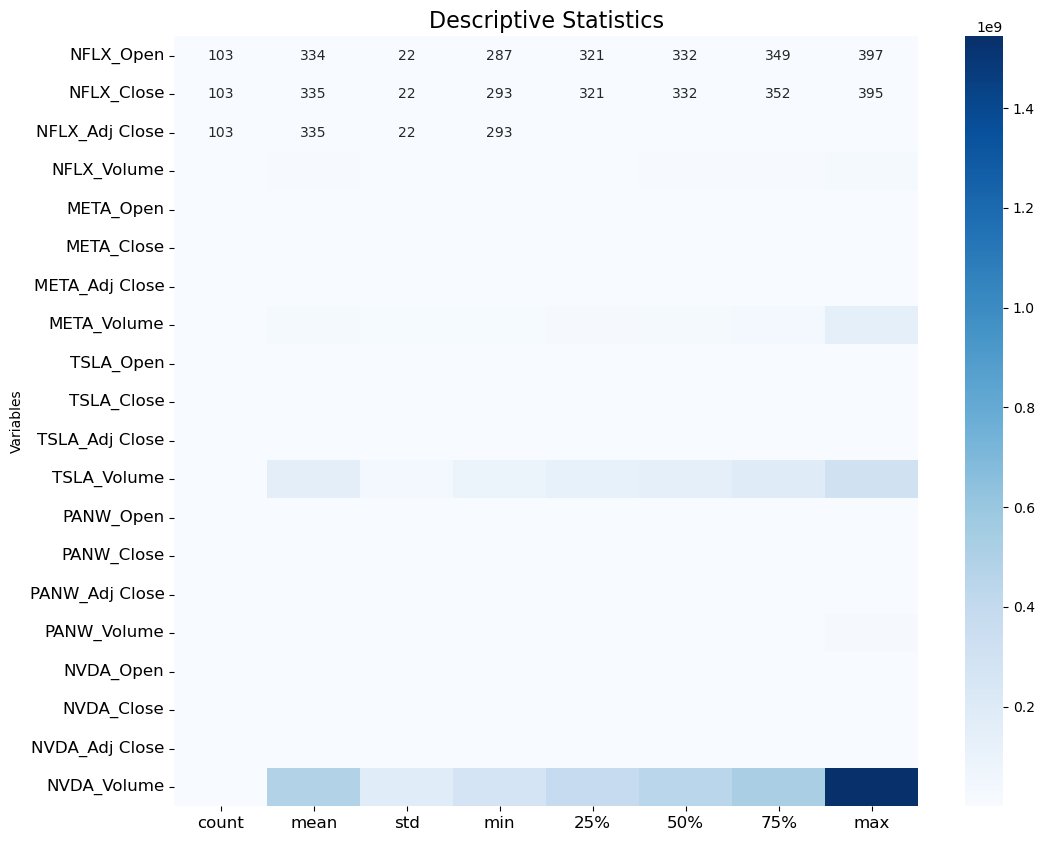

In [34]:
# Report view
report = final_df.describe().T  # Transpose index and columns
# Put report in a dataframe
report_df = pd.DataFrame(
    index=[
        "NFLX_Open",
        "NFLX_Close",
        "NFLX_Adj Close",
        "NFLX_Volume",
        "META_Open",
        "META_Close",
        "META_Adj Close",
        "META_Volume",
        "TSLA_Open",
        "TSLA_Close",
        "TSLA_Adj Close",
        "TSLA_Volume",
        "PANW_Open",
        "PANW_Close",
        "PANW_Adj Close",
        "PANW_Volume",
        "NVDA_Open",
        "NVDA_Close",
        "NVDA_Adj Close",
        "NVDA_Volume"
    ],
    columns=["count", "mean", "std", "min", "25%", "50%", "75%", "max"],
    data=report,
)
# Plot the report
f, ax = plt.subplots(figsize=(12, 10))
# Heatmap
sns.heatmap(report_df, annot=True, cmap="Blues", fmt=".0f")
plt.xticks(size=12)
plt.yticks(size=12, rotation=0)
plt.ylabel("Variables")
plt.title("Descriptive Statistics", size=16)
plt.show()

**Kernel Density Visualization**

In [45]:
final_cols = final_df.columns

D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

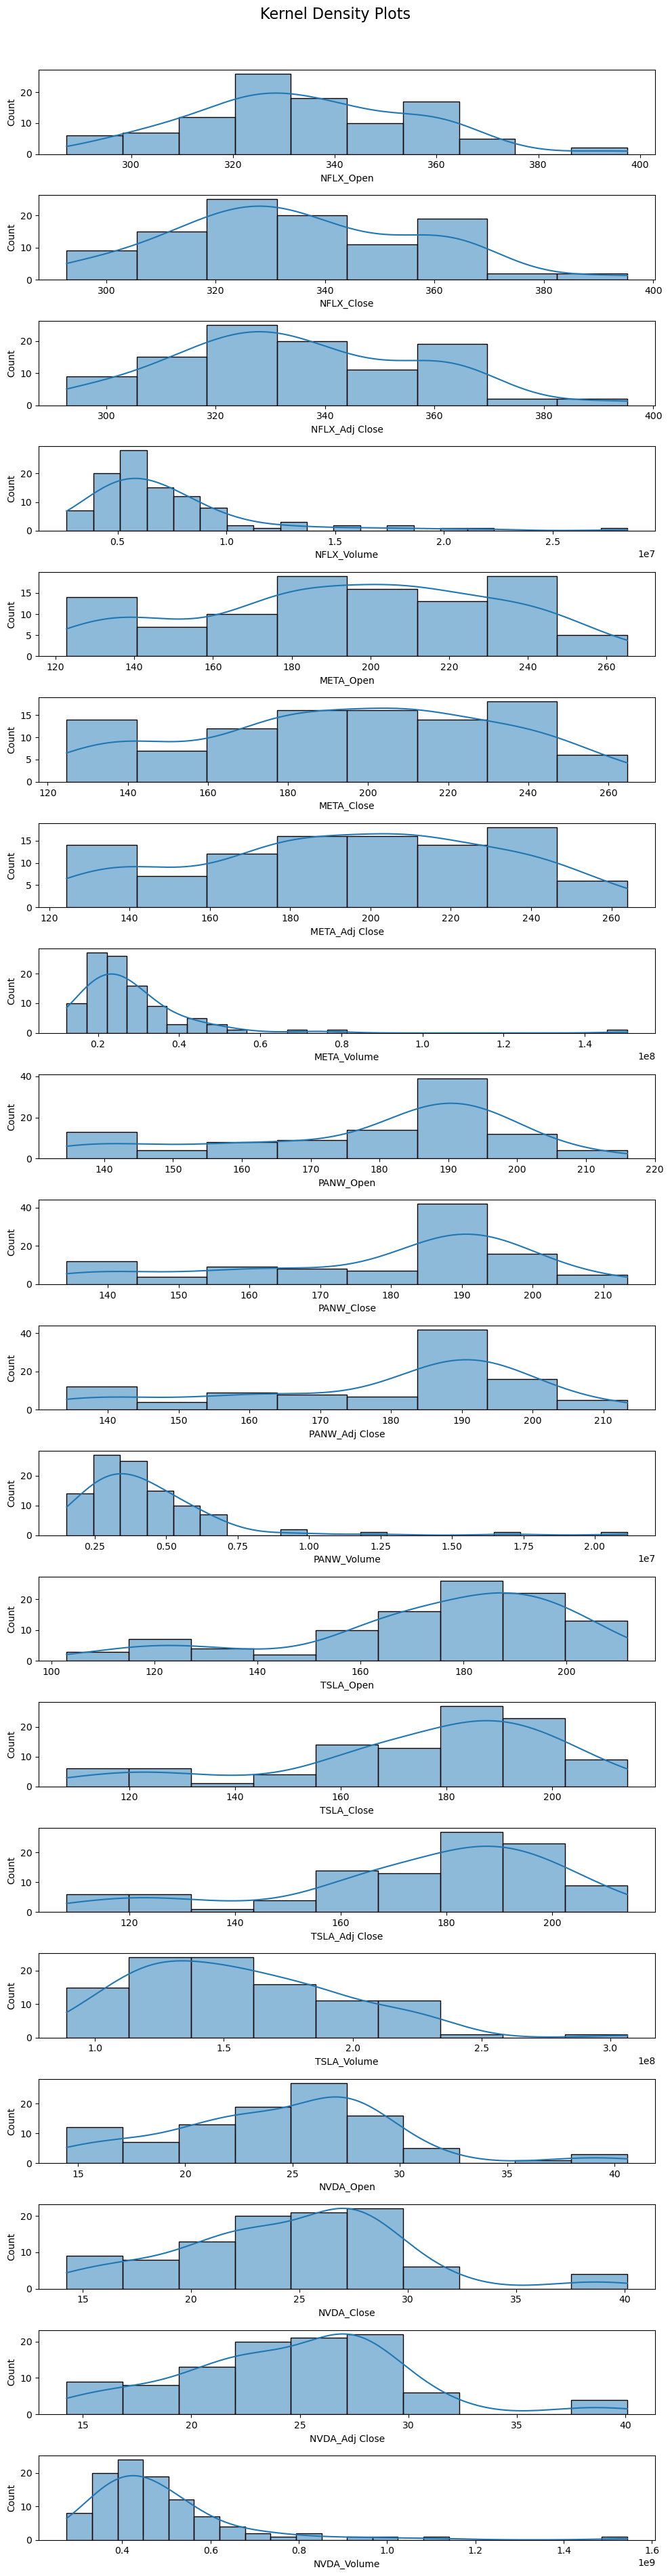

In [46]:
# Plotting 'price' target variable
fig, ax = plt.subplots(20, 1, figsize=(10, 40))
for i, col in enumerate(final_cols):
    sns.histplot(final_df[col], kde=True, bins="auto", ax=ax[i])
    ax[i].set_xlabel(col)
fig.suptitle("Kernel Density Plots", fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

**Plotting Adj_Close price for all companies**

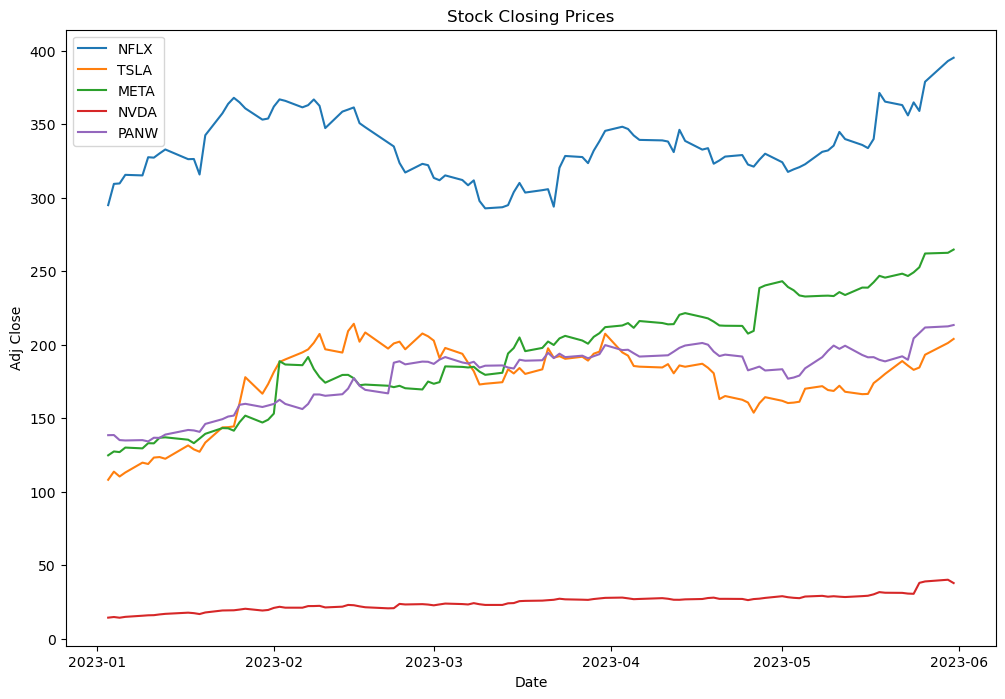

In [38]:
import matplotlib.pyplot as plt

company_list = ["NFLX", "TSLA", "META", "NVDA", "PANW"]
plt.figure(figsize=(12, 8))

for company in company_list:
    plt.plot(final_df[company + "_Close"], label=company)

plt.ylabel("Adj Close")
plt.xlabel("Date")
plt.title("Stock Closing Prices")
plt.legend()
plt.show()

**Plotting Volume of stocks sold for all companies**

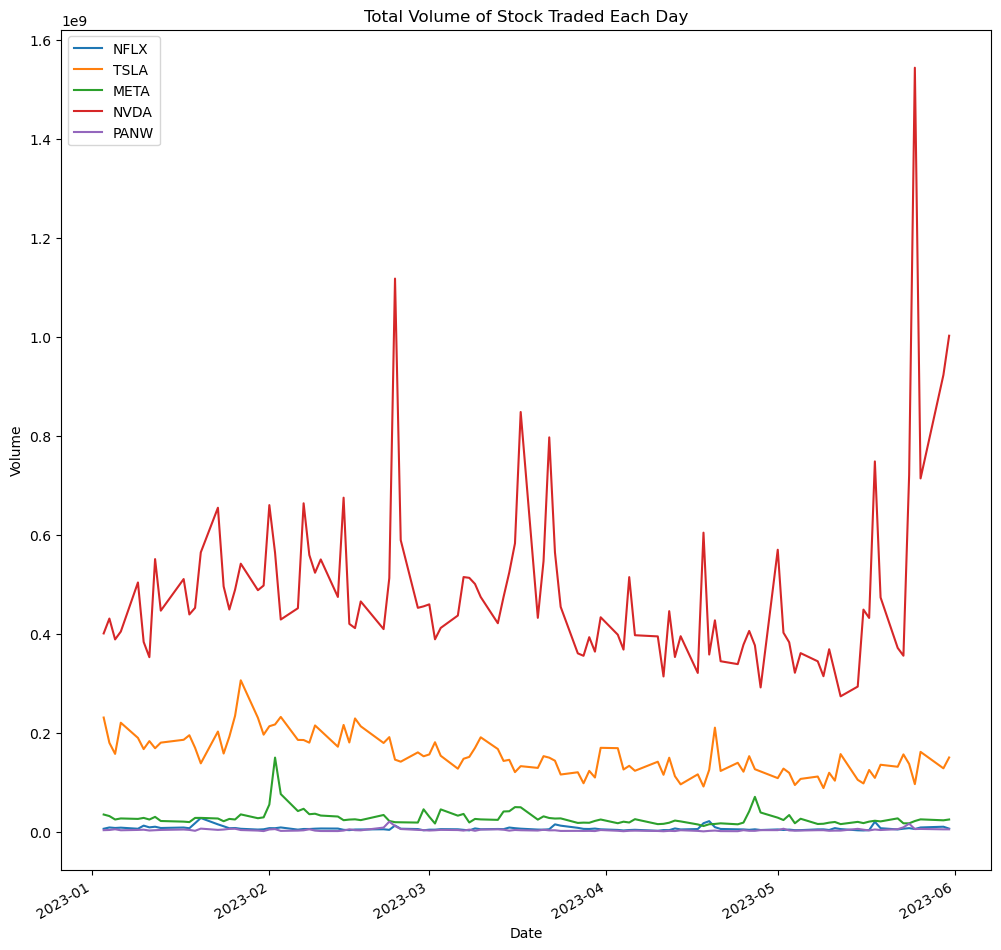

In [39]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)
plt.title("Total Volume of Stock Traded Each Day")

for company in company_list:
    final_df[company + "_Volume"].plot(label=company)

plt.ylabel("Volume")
plt.xlabel("Date")
plt.legend()
plt.show()

**Correlation between Open prices of all five stocks**

In [41]:
final_df[
    ["NFLX_Open", "NVDA_Open", "TSLA_Open", "PANW_Open", "META_Open"]
].corr().style.background_gradient(cmap="coolwarm")

,NFLX_Open,NVDA_Open,TSLA_Open,PANW_Open,META_Open
NFLX_Open,1.000000,0.289251,0.297924,0.060771,0.221219
NVDA_Open,0.289251,1.000000,0.526530,0.891090,0.945757
TSLA_Open,0.297924,0.526530,1.000000,0.696025,0.474769
PANW_Open,0.060771,0.891090,0.696025,1.000000,0.852091
META_Open,0.221219,0.945757,0.474769,0.852091,1.000000


**Expected Return vs. Risk**

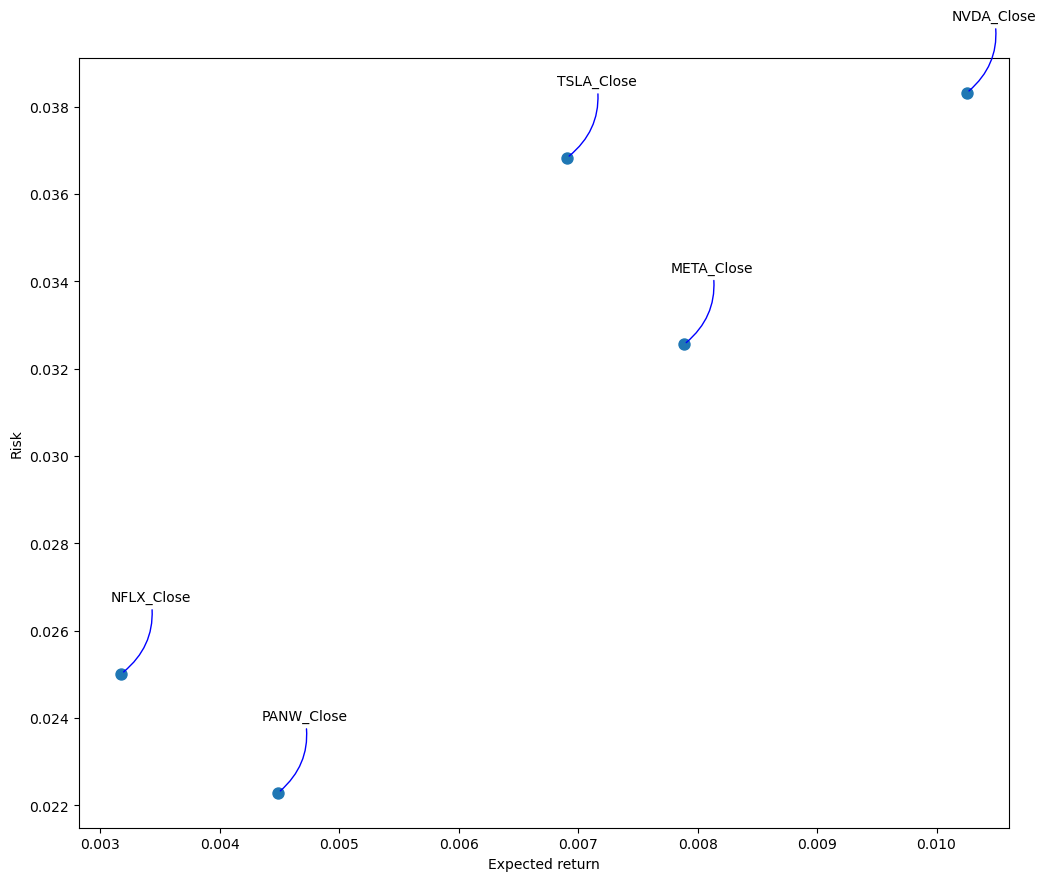

In [42]:
rets = tech_rets.dropna()
area = np.pi * 20
plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected return")
plt.ylabel("Risk")
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(50, 50),
        textcoords="offset points",
        ha="right",
        va="bottom",
        arrowprops=dict(arrowstyle="-", color="blue", connectionstyle="arc3,rad=-0.3"),
    )

Plotting Stock Trend and Pct. Returns

In [19]:
def plot_stock_trend_and_returns(ticker, titles, start_date, end_date, all_returns):
    # Get the data for this ticker
    prices = yf.download(ticker, start_date, end_date)
    prices = prices.Close

    # prices = web.DataReader(ticker, 'yahoo', start=start_date, end=end_date).Close
    prices.index = [d.date() for d in prices.index]

    plt.figure(figsize=(10, 6))

    # Plot stock price
    plt.subplot(2, 1, 1)
    plt.plot(prices)
    plt.title(titles[0], fontsize=16)
    plt.ylabel("Price ($)", fontsize=14)

    # Plot stock returns
    plt.subplot(2, 1, 2)
    plt.plot(all_returns[0], all_returns[1], color="c")
    plt.title(titles[1], fontsize=16)
    plt.ylabel("Pct. Return", fontsize=14)
    plt.axhline(0, color="k", linestyle="--")

    plt.tight_layout()

    plt.show()


Stock Performance Analysis

In [20]:
def perform_analysis_for_stock(
    ticker, start_date, end_date, return_period_weeks, verbose=False
):
    """
    Inputs:
        ticker: the ticker symbol to analyze
        start_date: the first date considered in simulation
        end_date: the last date considered in simulation
        return_period_weeks: the number of weeks in which to calculate returns
        verbose: True if you want to print simulation steps

    Outputs:
        average and standard deviation of returns for simulated runs of this ticker within the given date range
    """

    # Get the data for this ticker
    try:
        prices = yf.download(ticker, start_date, end_date)
        prices = prices.Close
    # Could not find data on this ticker
    except (RemoteDataError, KeyError):
        # Return default values
        return -np.inf, np.inf, None

    prices.index = [d.date() for d in prices.index]

    # This will store all simulated returns
    pct_return_after_period = []
    buy_dates = []

    # Assume we buy the stock on each day in the range
    for buy_date, buy_price in prices.items():
        # Get price of the stock after given number of weeks
        sell_date = buy_date + timedelta(weeks=return_period_weeks)

        try:
            sell_price = prices[prices.index == sell_date].iloc[0]
        # Trying to sell on a non-trading day, skip
        except IndexError:
            continue

        # Compute the percent return
        pct_return = (sell_price - buy_price) / buy_price
        pct_return_after_period.append(pct_return)
        buy_dates.append(buy_date)

        if verbose:
            print("Date Buy: %s, Price Buy: %s" % (buy_date, round(buy_price, 2)))
            print("Date Sell: %s, Price Sell: %s" % (sell_date, round(sell_price, 2)))
            print("Return: %s%%" % round(pct_return * 100, 1))
            print("-------------------")

    # If no data collected return default values
    if len(pct_return_after_period) == 0:
        return -np.inf, np.inf, None

    # Report average and deviation of the percent returns
    return (
        np.mean(pct_return_after_period),
        np.std(pct_return_after_period),
        [buy_dates, pct_return_after_period],
    )

In [21]:
# Start date for simulation.
# Further back means more training data but risk of including patterns that no longer exist
# More recent means less training data but only using recent patterns
start_date, end_date = datetime(2023, 6, 1), datetime(2024, 8, 31)

# set number of weeks in which you want to see return
return_period_weeks = 4

# Minimum average return
min_avg_return = 0.1

# Maximum volatility in return
max_dev_return = 0.07

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


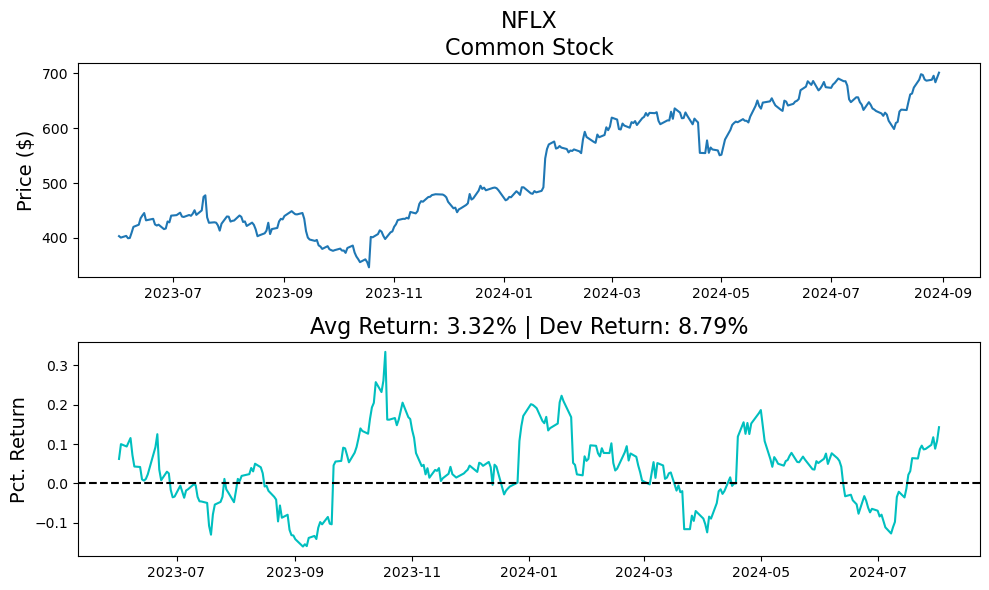

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


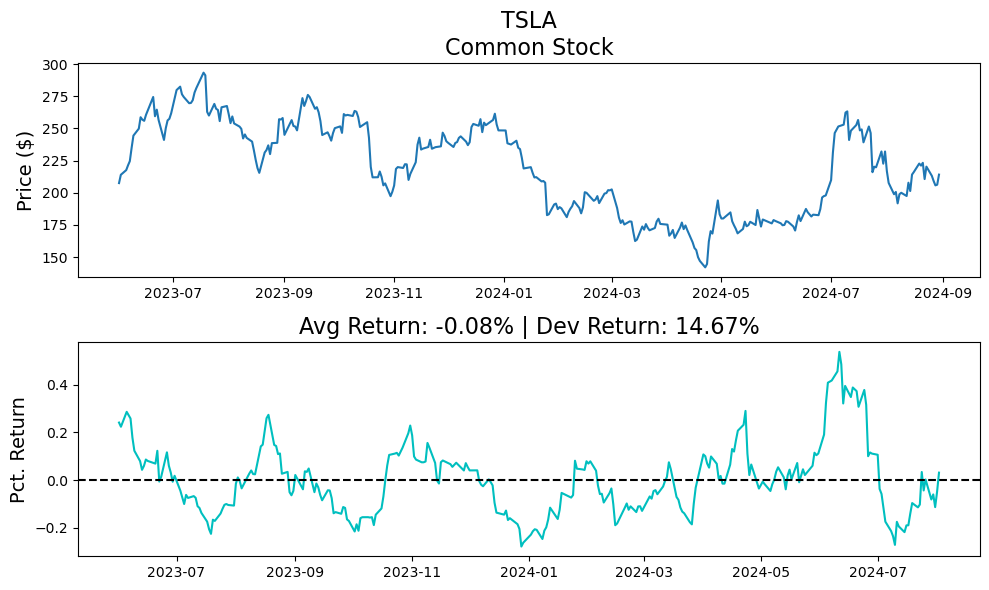

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


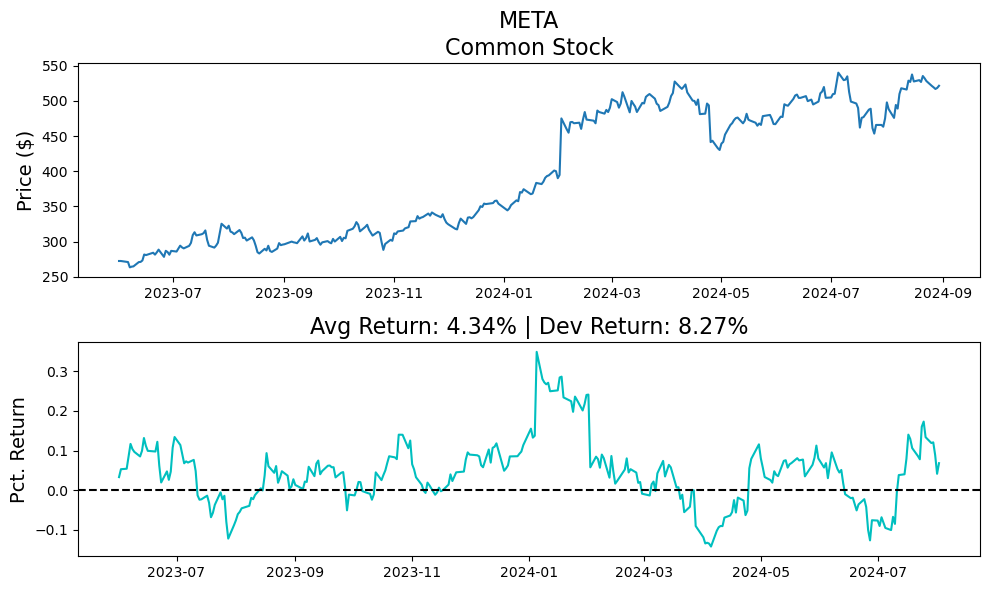

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


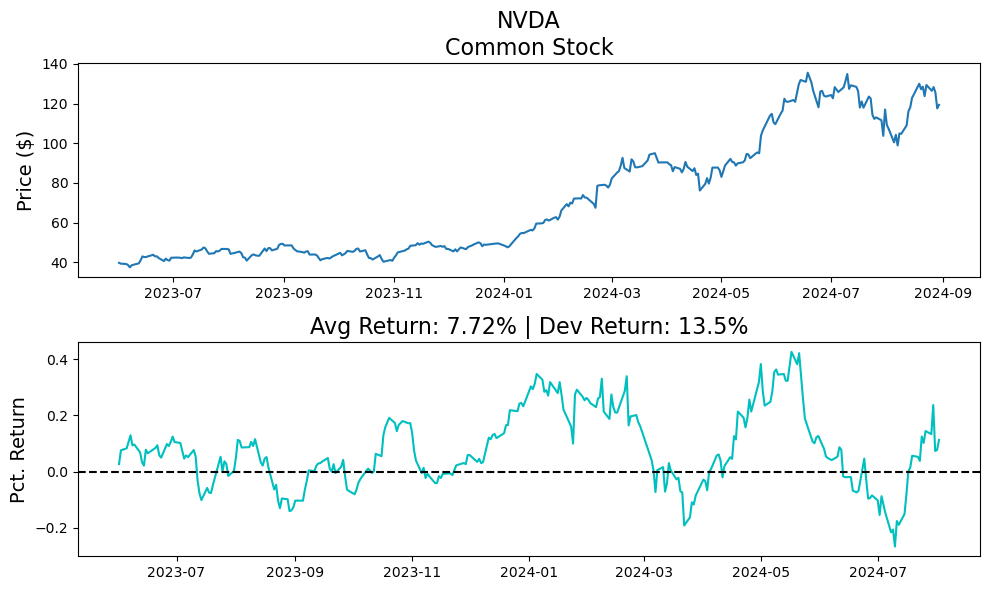

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


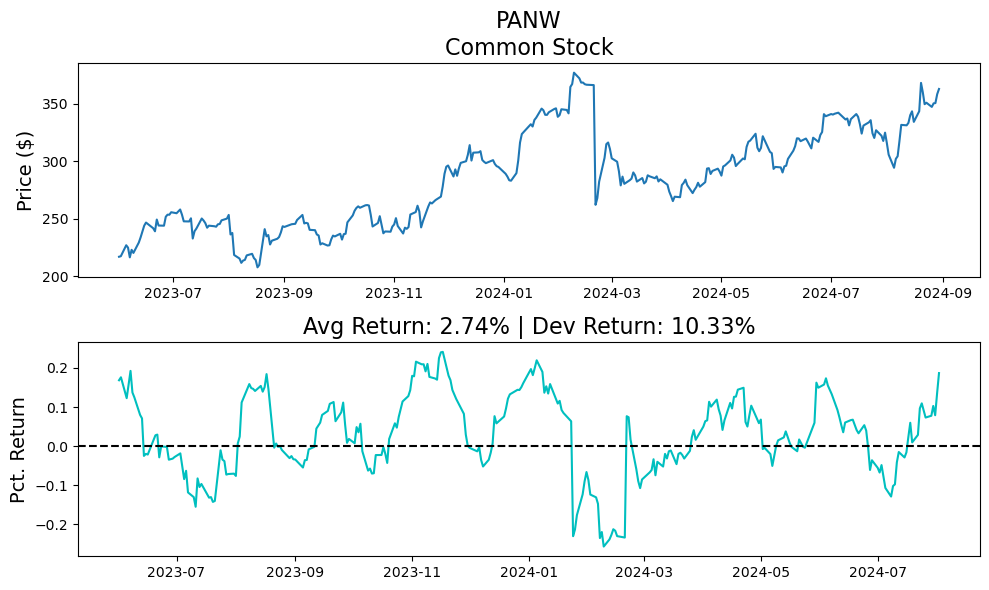

In [22]:
stocks = ["NFLX", "TSLA", "META", "NVDA", "PANW"]
for stock in stocks:
    avg_return, dev_return, all_returns = perform_analysis_for_stock(
        stock, start_date, end_date, return_period_weeks
    )
    title_price = "%s\n%s" % (stock, "Common Stock")
    title_return = "Avg Return: %s%% | Dev Return: %s%%" % (
        round(100 * avg_return, 2),
        round(100 * dev_return, 2),
    )
    plot_stock_trend_and_returns(
        stock, [title_price, title_return], start_date, end_date, all_returns
    )